# 伯努利分布

## 均值

$$\mu=p$$

## 方差

$$\sigma^2=p(1-p)$$

## 标准差

$$\sigma=\sqrt{p(1-p)}$$

其中$p$为单次伯努利试验的成功率

## 例题1

在一次全民对总统偏爱度的调查中，表示喜欢的比例为60%，不喜欢的比例为40%，求调查结果的均值、方差、标准差。

In [1]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
p_fav=0.6
b={'0':0.4, '1':0.6}

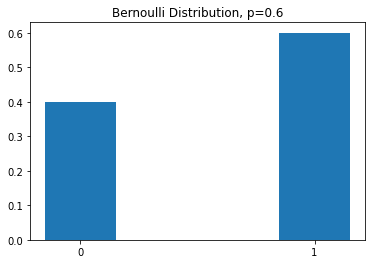

In [3]:
fig=plt.figure(figsize=(6,4))
ax1=fig.add_subplot(1,1,1)
ax1.bar(b.keys(), b.values(), width=0.3)
ax1.set_title(u"Bernoulli Distribution, p=0.6")
plt.show()

In [4]:
#模拟生成伯努利分布随机数
s=np.random.binomial(1, 0.6, 10000)

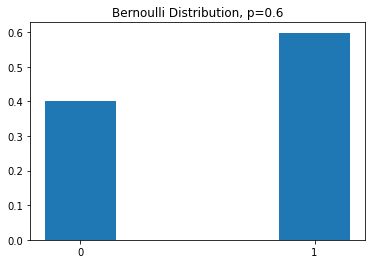

In [5]:
bins = np.arange(3)
plt.hist(s, bins, histtype='bar', rwidth=0.3, align='left', density=True)
plt.title(u"Bernoulli Distribution, p=0.6")
plt.xticks([0,1])
plt.show()

In [6]:
mean=p_fav
var=p_fav*(1-p_fav)
sd=np.sqrt(p_fav*(1-p_fav))
print("mean="+str(mean), "varivance="+str(var), "standard deviation="+str(round(sd, 2)))

mean=0.6 varivance=0.24 standard deviation=0.49


## 例题2  置信区间和误差范围

国家进行选举投票，有2位候选人A、B。对100名投票者进行调查，投票给A有57名，投票给B有43名。需要求得一个置信区间，使得投票给B的可能性有95%的概率在这个区间之内

In [4]:
# 设置投票给A=0，投票给B=1
n=100  #样本容量
mean_x=(57*0+43*1)/100  #样本均值
s2=(57*(0-mean_x)**2+43*(1-mean_x)**2)/(n-1)  #样本方差
s=np.sqrt(s2)  #样本标准差
sigma=s  #用样本标准差近似估计总体标准差
sigma_x=sigma/np.sqrt(n)  #样本均值抽样分布的标准差
# 根据经验法则，正态分布均值左右2个标准差范围内的概率为95%。则本题的样本均值应在样本均值抽样分布的均值左右2个标准差内，也可以说样本均值抽样分布的均值在样本均值的左右2个标准差内，也就mu_x在mean_x-2*sigma_x到mean_x+2*sigma_x之间。而mu=mu_x，所以置信度95%的总体均值置信区间在mean_x-2*sigma_x到mean_x+2*sigma_x之间
print("置信度95%的投票给B的置信区间为："+str(round(mean_x-2*sigma_x, 2))+"~"+str(round(mean_x+2*sigma_x, 2)))
# 也可以说，95%置信度的总体均值的误差范围为2*sigma_x

置信度95%的投票给B的置信区间为：0.33~0.53


## 例题3

学校从6250名老师中随机选出250名，调查计算机是否为必备的教学工具，142名老师认为是，剩余的认为不是。1、计算置信度99%的认为计算机是必备教学工具的置信区间。2、如何调整调查方法，使概率区间变小，但维持置信度99%不变。

In [5]:
# 设置认为不是=0，认为是=1
n=250  #样本容量
mean_x=142/250  #样本均值
s2=(142*(1-mean_x)**2+108*(0-mean_x)**2)/(n-1)  #样本方差
s=np.sqrt(s2)  #样本标准差
sigma=s  #用样本标准差近似估计总体标准差
sigma_x=sigma/np.sqrt(n)  #样本均值抽样分布的标准差
zscore=stats.norm.ppf(0.5+0.99/2)
print("置信度99%的认为计算机是必备教学工具的置信区间为："+str(round(mean_x-sigma_x*zscore, 3))+"~"+str(round(mean_x+sigma_x*zscore, 3)))
# 如果增加样本容量，将降低样本标准，从而使置信区间变小

置信度99%的认为计算机是必备教学工具的置信区间为：0.487~0.649
